# Modeling Damped Oscillation

In [56]:
# Importing Libraries
import pandas as pd
import math
import numpy as np
from Unit0 import euler_method
import matplotlib.pyplot as plt

In [57]:
# Constants
gravitational_acceleration = -9.81  # m/s^2
angle = math.radians(11)  # rad
masses = [0.90646, 1.14781, 0.90646, 1.14781, 0.40646]  # kg
spring_constants = [23.9268292683, 23.9268292683, 9.81, 23.9268292683, 23.9268292683]  # N/m
coefficient_of_friction = 0.01397553517  # N*s/m
initial_positions = [0.08, 0.08, 0.2, 0.2, 0.1]  # m

In [58]:
def graph_models(times, undamped, damped, name, units, data_times=None, data=None):
    if data_times is not None and data is not None:
        plt.plot(data_times, data, label=f"Data {name}")
    plt.plot(times, undamped, label=f"Undamped {name}")
    plt.plot(times, damped, label=f"Damped {name}")
    plt.title(f"{name} vs Time")
    plt.xlabel('Time (s)')
    plt.ylabel(f"{name} ({units})")
    plt.legend()
    plt.show()

In [59]:
def compute_models(index):
    # Computational Model
    def compute_acceleration_undamped(t, x, v, a):
        return math.sin(angle) * gravitational_acceleration - spring_constants[index] * x / masses[index]

    def computational_model_undamped(times, position_initial):
        return euler_method.compute(compute_acceleration_undamped, times=times, position_initial=position_initial)

    def compute_acceleration_damped(t, x, v, a):
        return math.sin(angle) * gravitational_acceleration - spring_constants[index] * x / masses[index] + coefficient_of_friction * math.cos(angle) * gravitational_acceleration * np.sign(v)

    def computational_model_damped(times, position_initial):
        return euler_method.compute(compute_acceleration_damped, times=times, position_initial=position_initial)

    times = np.linspace(0, 10, 10000)
    _, positions_undamped, velocities_undamped, accelerations_undamped = computational_model_undamped(times, initial_positions[index])
    _, positions_damped, velocities_damped, accelerations_damped = computational_model_damped(times, initial_positions[index])
    
    data = pd.read_csv(f"Data/Data{index + 1}.csv")

    # graph_models(times, accelerations_undamped, accelerations_damped, "Acceleration", "m/s^2")
    # graph_models(times, velocities_undamped, velocities_damped, "Velocity", "m/s")
    graph_models(times, positions_undamped, positions_damped, "Position", "m", data["Time (s)"], data["Position (m)"])

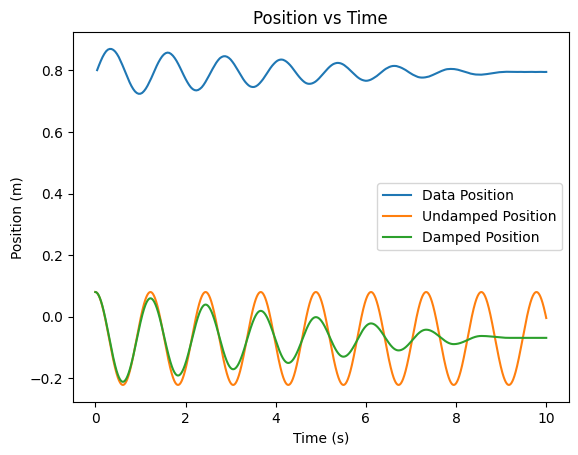

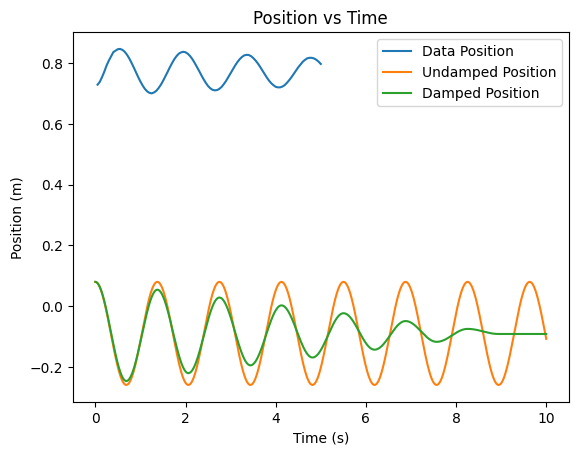

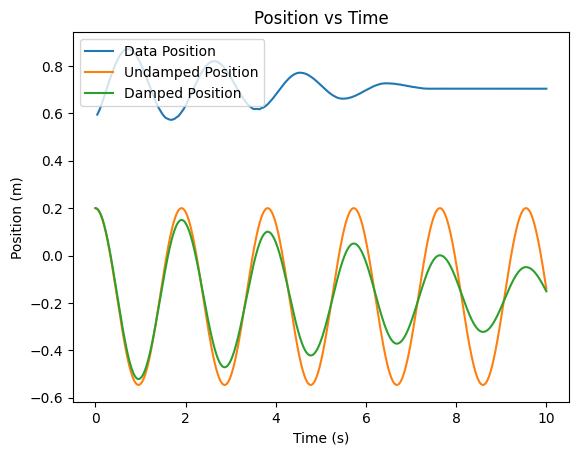

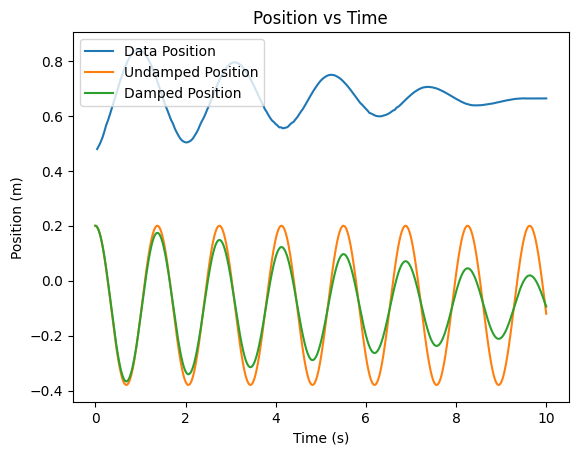

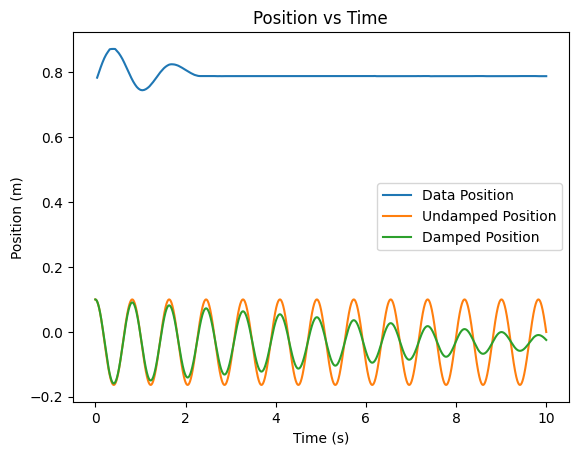

In [60]:
compute_models(0)
compute_models(1)
compute_models(2)
compute_models(3)
compute_models(4)